In [72]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [73]:
file_id = '1_CMZ1t9qGd-3N5Zg4TyelML3TB2fskj9' #-- Updated File ID for my zip
file_obj = drive.CreateFile({'id': file_id})
file_obj.GetContentFile('archive.zip') 

In [76]:
import pandas as pd
import numpy as np
import zipfile

In [ ]:
file_obj

In [131]:
archive = zipfile.ZipFile('archive.zip', 'r')
xlfile = archive.open('AirPassengers.csv')
df = pd.read_csv(xlfile, index_col=False)

In [132]:
df1 = df.rename(columns={"Month":"Date"})


In [133]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1.head()

,Date,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [96]:
pip install plotly==5.1.0

In [134]:
df1['MA12'] = df1['#Passengers'].rolling(12).mean()



In [135]:
df1

,Date,#Passengers,MA12
0,1949-01-01,112,NaN
1,1949-02-01,118,NaN
2,1949-03-01,132,NaN
3,1949-04-01,129,NaN
4,1949-05-01,121,NaN
...,...,...,...
139,1960-08-01,606,463.333333
140,1960-09-01,508,467.083333
141,1960-10-01,461,471.583333
142,1960-11-01,390,473.916667


In [136]:
# plot the data and MA
import plotly.express as px
fig = px.line(df1, x="Date", y=["#Passengers", "MA12"], template = 'plotly_dark')
fig.show()

In [138]:
# extract month and year from dates**
df1['Month'] = [i.month for i in df1['Date']]
df1['Year'] = [i.year for i in df1['Date']]

In [139]:
df1['Series'] = np.arange(1,len(df1)+1)

df1.drop(['Date', 'MA12'], axis=1, inplace=True)
data = df1[['Series', 'Year', 'Month', '#Passengers']] 


In [140]:
data.head(13)

,Series,Year,Month,#Passengers
0,1,1949,1,112
1,2,1949,2,118
2,3,1949,3,132
3,4,1949,4,129
4,5,1949,5,121
5,6,1949,6,135
6,7,1949,7,148
7,8,1949,8,148
8,9,1949,9,136
9,10,1949,10,119


In [25]:
train = data[data['Year'] < 1960]  # split data into train-test set
test = data[data['Year'] >= 1960]

train.shape, test.shape


((132, 4), (12, 4))

In [ ]:
pip install pycaret


In [26]:
from pycaret.regression import *

In [27]:
# initialize setup**
s = setup(data = train, test_data = test, target = '#Passengers', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,#Passengers
2,Original Data,"(132, 4)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(132, 13)"


In [28]:
best = compare_models(sort = 'MAE')


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lar,Least Angle Regression,22.3980,923.8651,28.2855,0.5621,0.0878,0.0746,0.0200
lr,Linear Regression,22.3981,923.8747,28.2856,0.5621,0.0878,0.0746,0.9533
huber,Huber Regressor,22.4244,892.2573,27.9475,0.5981,0.0880,0.0749,0.0367
br,Bayesian Ridge,22.4783,932.2165,28.5483,0.5611,0.0884,0.0746,0.0200
ridge,Ridge Regression,23.1976,1003.9423,30.0409,0.5258,0.0933,0.0764,0.0233
lasso,Lasso Regression,38.4188,2413.5097,46.8468,0.0882,0.1473,0.1241,0.0200
en,Elastic Net,40.6486,2618.8751,49.4048,-0.0824,0.1563,0.1349,0.0200
omp,Orthogonal Matching Pursuit,44.3054,3048.2658,53.8613,-0.4499,0.1713,0.1520,0.0167
gbr,Gradient Boosting Regressor,50.1217,4032.0567,61.2306,-0.6189,0.2034,0.1538,0.0433
rf,Random Forest Regressor,52.7754,4705.6863,65.6728,-0.7962,0.2148,0.1592,0.3967


In [29]:
predict_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,25.0714,972.2733,31.1813,0.8245,0.0692,0.0571


In [85]:
final_best = finalize_model(best)


MAE on the test set is **12% **higher than the cross-validated MAE.


In [100]:
# Creating a future data set from 1961 to 65
future_dates = pd.date_range(start= '1961-01-01', end = '1965-01-01', freq = 'MS')

future_df = pd.DataFrame()

future_df['Month'] = [i.month for i in future_dates]
future_df['Year'] = [i.year for i in future_dates]
future_df['Series'] = np.arange(145, (145+len(future_dates)))
future_df.head()   



,Month,Year,Series
0,1,1961,145
1,2,1961,146
2,3,1961,147
3,4,1961,148
4,5,1961,149


In [53]:
future_df.head()


,Month,Year
0,1,1961
1,2,1961
2,3,1961
3,4,1961
4,5,1961


In [58]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [101]:
predictions_future = predict_model(final_best, data=future_df)
predictions_future.head()

,Month,Year,Series,Label
0,1,1961,145,486.278268
1,2,1961,146,482.208187
2,3,1961,147,550.485967
3,4,1961,148,535.187177
4,5,1961,149,538.923789


In [143]:
data.head()

,Series,Year,Month,#Passengers
0,1,1949,1,112
1,2,1949,2,118
2,3,1949,3,132
3,4,1949,4,129
4,5,1949,5,121


In [145]:
from google.colab import files

data.to_csv('historical.csv')
files.download('historical.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [147]:
predictions_future.to_csv('predicted.csv')
files.download('predicted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Using Power BI I have generated the outputs for historical and predicted.
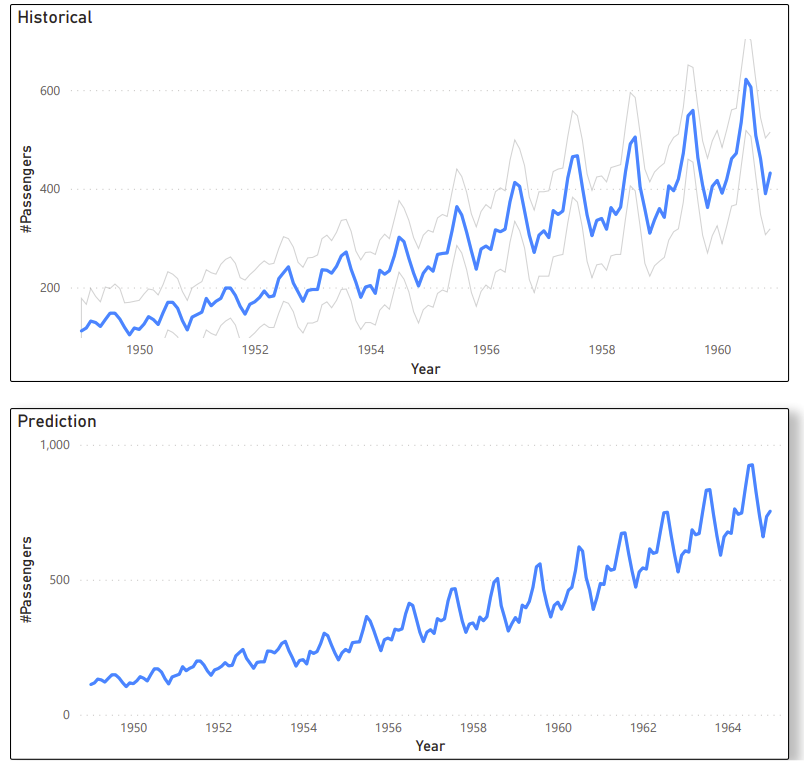